In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pathlib
import os
import sys
import amazon_processor

In [2]:
# Custom functions
import pathlib
import os
import sys

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/amazon', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1']


In [3]:
datapath_train = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.lrn.csv")
display(datapath_train)
datapath_test = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.tes.csv")
display(datapath_test)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.lrn.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.tes.csv')

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,8,6,10,6,7,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,Chell
1,13,1,13,9,8,8,2,3,2,4,...,4,1,2,1,0,1,0,0,0,Engineer
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,1,0,0,0,0,Grove
3,8,11,10,11,3,7,0,4,2,1,...,0,0,1,0,0,0,2,1,0,Davisson
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,1,0,0,1,0,1,0,0,Riley
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,1,0,0,0,1,Neal
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,1,1,0,4,Messick
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,2,0,0,0,Mitchell


In [5]:
feature = df_train.loc[:,'V1':'V10000']
target = df_train.loc[:,'Class':'Class']

In [ ]:
def plot_corr_heatmap(df, fmt=".2f", feat_to_ret="Class", ticksfont=12,abs = True):
    Class_description = []
    Class_description = pd.unique(df.Class)

    for i in range(len(Class_description)):
        df.Class[df.Class == Class_description[i]] = i+1
    
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
    # Compute correlations and save in matrix
    if abs:
        corr = np.abs(df.corr()) # We only used absolute values for visualization purposes! ..."hot-cold" view to just sort between 
    else:
        corr = df.corr()

    # Mask the repeated values --> here: upper triangle

    #print(corr)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True # mask upper triangle

    corr_to_feat = corr.loc[:,feat_to_ret]
    
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, annot=True, fmt=fmt , mask=mask, vmin=0, vmax=1, linewidths=.5,cmap="YlGnBu")
    plt.tick_params(labelsize=ticksfont)
    return corr_to_feat

# Feature selection

## varianz selection

In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_lrn_var = sel.fit_transform(X_lrn)
pd.DataFrame(X_lrn_var)

In [ ]:
k = 4

## k-best selection

In [ ]:


#num_features = X_lrn.shape[1]
#k= int(sqrt(num_features)*1.7)
X_lrn_kb = SelectKBest(chi2, k=k).fit_transform(X_lrn, Y_lrn)
X_lrn_kb.shape

In [ ]:
sns.pairplot(pd.DataFrame(X_lrn_kb))

## PCA

In [ ]:
pca = PCA(n_components=k)
X_lrn_PCA = pca.fit(X_lrn.values).transform(X_lrn.values)
X_lrn_PCA.shape
pd.DataFrame(X_lrn_PCA)

In [ ]:
sns.pairplot(pd.DataFrame(X_lrn_PCA))

In [ ]:
corr_to_class_stripped = functions.plot_corr_heatmap(X_lrn_PCA, ticksfont=16,abs = False)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=.4)
X_train.shape

In [ ]:
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_SC = scaler.transform(X_train) 
X_valid_SC = scaler.transform(X_valid) 

In [ ]:
g = 100
start = time.time()
#X_train, df_test = functions.DefinScaler(best_params_SC["scaler"], X_train, df_test)
clf = MLPClassifier(hidden_layer_sizes=(g,g),alpha=0.1,activation="relu",solver="adam",max_iter=200)
clf.fit(X_train_SC, Y_train)
Y_pred = clf.predict(X_valid_SC)
ende = time.time()
print(accuracy_score(Y_valid, Y_pred),'{:5.3f}s'.format(ende-start))


In [ ]:
def MLP_selection(h, X_lrn, Y_lrn):
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=.4)
    scaler = StandardScaler()  
    scaler.fit(X_train) 
    X_train_SC = scaler.transform(X_train) 
    X_valid_SC = scaler.transform(X_valid)  
    clf = MLPClassifier(hidden_layer_sizes=(h,h),alpha=0.1,activation="relu",solver="adam",max_iter=200)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_valid)
    score = accuracy_score(Y_valid, Y_pred)
    print("MLP: ", "score: ",score)
    return score

def RF_selection(X_lrn, Y_lrn):
    rf_shallow = RFC(n_jobs=4, n_estimators=2000, max_features=0.02,bootstrap=True, oob_score=True, max_depth=60, min_samples_leaf=4, min_samples_split=4,verbose=0)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=.4)
    scaler = StandardScaler()  
    scaler.fit(X_train) 
    X_train_SC = scaler.transform(X_train) 
    X_valid_SC = scaler.transform(X_valid)    

    rf_shallow.fit(X_train, Y_train)
    Y_pred = rf_shallow.predict(X_valid)
    score = accuracy_score(Y_valid, Y_pred)
    print("RF: ", "score: ",score)
    return score


    #print(accuracy_score(Y_valid, Y_pred),'{:5.3f}s'.format(ende-start))
def FeatureSelection(selector, k, X_lrn, Y_lrn):
    if selector == "KBest":
        df = pd.DataFrame(SelectKBest(chi2, k=k).fit_transform(X_lrn, Y_lrn))
    if selector == "PCA":
        pca = PCA(n_components=k)
        df = pca.fit(X_lrn.values).transform(X_lrn.values)

    return df

def CompairFeatueSelection(mod,selector, k, X_lrn, Y_lrn,h):
    X_lrn_FS = FeatureSelection(selector, k, X_lrn, Y_lrn)
    if mod == "MLP":
        score = MLP_selection(h, X_lrn_FS, Y_lrn)
    if mod == "RF":
        score = RF_selection(X_lrn_FS, Y_lrn)
    #if mod == "KNN":
    #    score = MLP_selection(h, X_lrn_FS, Y_lrn)
    #print("k: ",k,"h:",h , "score: ",score)
    return score



In [ ]:
score_list = []
k = [10,20,30,50,100,200,300,400,500,1000,1500]
k = [200,300,400,500,700,1000,1100,1200,1300,1500]
hidden = 200
selector = ["KBest","PCA"]
model = ["MLP", "RF"]
for select in selector:
    for mod in model:
        score_list = []
        for ki in k:
            score = CompairFeatueSelection(mod, select, ki, X_lrn, Y_lrn, hidden)
            score_list.append(score)
        plt.figure()
        plt.grid()
        plt.title("{} {}".format(select,mod))
        plt.plot(k,score_list)

# Training

In [ ]:
df_prep = amazon_processor.Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = "standard")
df_prep

## RandomForrest 

In [ ]:
rf_shallow = RFC(n_jobs=4, n_estimators=10000, max_features=0.02,bootstrap=True, oob_score=True, max_depth=60, min_samples_leaf=4, min_samples_split=4,verbose=1000)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=.4)
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_SC = scaler.transform(X_train) 
X_valid_SC = scaler.transform(X_valid)

rf_shallow.fit(X_train, Y_train)
Y_pred = rf_shallow.predict(X_valid)
score = accuracy_score(Y_valid, Y_pred)
print("RF: ", "score: ",score)

In [20]:
results = pd.DataFrame(columns=["Model", "Feature_Selector", "k", "Scaler", "Score", "Trainingstime", "Fittime"])
results

,Model,Feature_Selector,k,Scaler,Score,Trainingstime,Fittime


In [24]:
results = pd.DataFrame(columns=["Model", "Feature_Selector", "k", "Scaler", "Score", "Trainingstime", "Fittime"])
#results = pd.DataFrame(params)
model = ["Knn", "RM", "MLP"]
score_list = []
kn = [10,30,60,90,100,120,140,200,300,400,500,750,1000]
#kn = [750]
selector = ["kBest"]#,"PCA"]
scale = ["standard","minmax","quantil"]
h = 300
max_k = 10
for mod in model:
    print("\t")
    for sel in selector:
        for k in kn:
            for scl in scale:           
                df_prep = amazon_processor.Preprocessing_Amazon(feature, target,feature_method = sel,scale_method = scl, k = k)
                X_train, X_valid, Y_train, Y_valid = train_test_split(df_prep, target, test_size=.4)
                if (mod == "RM"):
                    start = time.time()
                    clf = RFC(n_jobs=4, n_estimators=2000, max_features=0.02,bootstrap=True, oob_score=True, max_depth=60, min_samples_leaf=4, min_samples_split=4)
                    end = time.time()
                    train_time = end - start
                if (mod == "MLP"):
                    start = time.time()
                    clf = MLPClassifier(hidden_layer_sizes=(h),alpha=0.1,activation="relu",solver="adam",max_iter=200)
                    end = time.time()
                    train_time = end - start
                if (mod == "Knn"):
                    score_list = []
                    for knn in range(1, max_k):
                        model = KNeighborsClassifier(n_neighbors=knn).fit(X_train, Y_train)
                        Y_pred = model.predict(X_valid)
                        score = accuracy_score(Y_valid, Y_pred)
                        score_list.append(score)
                    knn = score_list.index(max(score_list))+1

                    start = time.time()
                    clf = KNeighborsClassifier(n_neighbors=knn).fit(X_train, Y_train)
                    end = time.time()
                    train_time = end - start
                        

                start = time.time()
                clf.fit(X_train, Y_train)
                end = time.time()
                fit_time = end - start

                Y_pred = clf.predict(X_valid)
                score = accuracy_score(Y_valid, Y_pred)
                print("Model: ",mod, "score: ",score,"k: ",k,"scaler: ",scl, "selector: ",sel)
                print("Model: ",mod, "Traintime: ",train_time,"fit_time: ",fit_time)
                params["Model"]= mod
                params["Feature_Selector"] = sel
                params["k"] = k
                params["Scaler"] = scl
                params["Trainingstime"] = train_time
                params["Fittime"] = fit_time
                results = results.append({'Model': mod, "Feature_Selector": sel, "k": k, "Scaler": scl, "Score": score, "Trainingstime": train_time, "Fittime": fit_time}, ignore_index=True)

	
Model:  Knn score:  0.12 k:  10 scaler:  standard selector:  kBest
Model:  Knn Traintime:  0.002683877944946289 fit_time:  0.002694845199584961
Model:  Knn score:  0.12666666666666668 k:  10 scaler:  minmax selector:  kBest
Model:  Knn Traintime:  0.0026903152465820312 fit_time:  0.0026497840881347656
Model:  Knn score:  0.10666666666666667 k:  10 scaler:  quantil selector:  kBest
Model:  Knn Traintime:  0.005135059356689453 fit_time:  0.0042002201080322266
Model:  Knn score:  0.21666666666666667 k:  30 scaler:  standard selector:  kBest
Model:  Knn Traintime:  0.0032205581665039062 fit_time:  0.0030059814453125
Model:  Knn score:  0.23666666666666666 k:  30 scaler:  minmax selector:  kBest
Model:  Knn Traintime:  0.002995729446411133 fit_time:  0.0032308101654052734
Model:  Knn score:  0.2833333333333333 k:  30 scaler:  quantil selector:  kBest
Model:  Knn Traintime:  0.005315303802490234 fit_time:  0.005805015563964844
Model:  Knn score:  0.35 k:  60 scaler:  standard selector:  kB

In [50]:
results.head()

,Model,Feature_Selector,k,Scaler,Score,Trainingstime,Fittime
0,Knn,kBest,10,standard,0.120000,0.002684,0.002695
1,Knn,kBest,10,minmax,0.126667,0.002690,0.002650
2,Knn,kBest,10,quantil,0.106667,0.005135,0.004200
3,Knn,kBest,30,standard,0.216667,0.003221,0.003006
4,Knn,kBest,30,minmax,0.236667,0.002996,0.003231


In [62]:
#df_plot_standard = results.drop("minmax",axis = 1)
#df_plot_standard = results.drop("minmax" , inplace=True)
df_plot_standard = results[ results['Scaler'] == "standard"]
df_plot_standard_knn = df_plot_standard[df_plot_standard["Model"] == "Knn"]
df_plot_standard_knn

df_plot_minmax = results[ results['Scaler'] == "minmax"]
df_plot_minmax_knn = df_plot_minmax[df_plot_minmax["Model"] == "Knn"]
df_plot_minmax_knn

df_plot_quantil = results[ results['Scaler'] == "quantil"]
df_plot_quantil_knn = df_plot_quantil[df_plot_quantil["Model"] == "Knn"]
df_plot_quantil_knn

,Model,Feature_Selector,k,Scaler,Score,Trainingstime,Fittime
2,Knn,kBest,10,quantil,0.106667,0.005135,0.004200
5,Knn,kBest,30,quantil,0.283333,0.005315,0.005805
8,Knn,kBest,60,quantil,0.296667,0.004193,0.003863
11,Knn,kBest,90,quantil,0.403333,0.006579,0.004368
14,Knn,kBest,100,quantil,0.400000,0.005126,0.006410
17,Knn,kBest,120,quantil,0.413333,0.005058,0.005743
20,Knn,kBest,140,quantil,0.406667,0.009600,0.006879
23,Knn,kBest,200,quantil,0.390000,0.008388,0.007821
26,Knn,kBest,300,quantil,0.403333,0.014186,0.014261
29,Knn,kBest,400,quantil,0.376667,0.012822,0.012135


In [70]:
df_plot_standard = results[ results['Scaler'] == "standard"]
df_plot_standard_RM = df_plot_standard[df_plot_standard["Model"] == "RM"]
df_plot_standard_RM

df_plot_minmax = results[ results['Scaler'] == "minmax"]
df_plot_minmax_RM = df_plot_minmax[df_plot_minmax["Model"] == "RM"]
df_plot_minmax_RM

df_plot_quantil = results[ results['Scaler'] == "quantil"]
df_plot_quantil_RM = df_plot_quantil[df_plot_quantil["Model"] == "RM"]
df_plot_quantil_RM

,Model,Feature_Selector,k,Scaler,Score,Trainingstime,Fittime
41,RM,kBest,10,quantil,0.143333,0.004907,6.592855
44,RM,kBest,30,quantil,0.320000,0.005251,6.993570
47,RM,kBest,60,quantil,0.363333,0.003177,7.004569
50,RM,kBest,90,quantil,0.393333,0.002811,6.857221
53,RM,kBest,100,quantil,0.543333,0.003415,7.465362
56,RM,kBest,120,quantil,0.423333,0.003247,7.186317
59,RM,kBest,140,quantil,0.380000,0.002957,6.555482
62,RM,kBest,200,quantil,0.530000,0.002892,6.315174
65,RM,kBest,300,quantil,0.556667,0.003072,6.006686
68,RM,kBest,400,quantil,0.493333,0.003492,6.710737


In [71]:
df_plot_standard = results[ results['Scaler'] == "standard"]
df_plot_standard_MLP = df_plot_standard[df_plot_standard["Model"] == "MLP"]
df_plot_standard_MLP

df_plot_minmax = results[ results['Scaler'] == "minmax"]
df_plot_minmax_MLP = df_plot_minmax[df_plot_minmax["Model"] == "MLP"]
df_plot_minmax_MLP

df_plot_quantil = results[ results['Scaler'] == "quantil"]
df_plot_quantil_MLP = df_plot_quantil[df_plot_quantil["Model"] == "MLP"]
df_plot_quantil_MLP

,Model,Feature_Selector,k,Scaler,Score,Trainingstime,Fittime
80,MLP,kBest,10,quantil,0.133333,0.000078,2.947943
83,MLP,kBest,30,quantil,0.390000,0.000079,3.268600
86,MLP,kBest,60,quantil,0.473333,0.000044,3.580670
89,MLP,kBest,90,quantil,0.550000,0.000068,4.581147
92,MLP,kBest,100,quantil,0.556667,0.000045,3.778542
95,MLP,kBest,120,quantil,0.546667,0.000046,4.169425
98,MLP,kBest,140,quantil,0.526667,0.000042,5.750101
101,MLP,kBest,200,quantil,0.586667,0.000044,4.690938
104,MLP,kBest,300,quantil,0.616667,0.000046,5.920990
107,MLP,kBest,400,quantil,0.620000,0.000043,6.507816


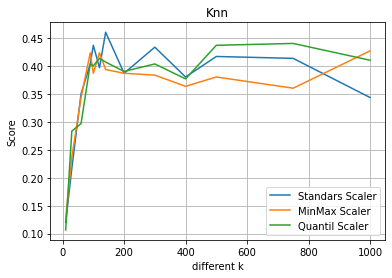

In [78]:
plt.grid()
plt.plot(df_plot_standard_knn["k"],df_plot_standard_knn.Score,label = "Standars Scaler")
plt.plot(df_plot_minmax_knn.k,df_plot_minmax_knn.Score,label = "MinMax Scaler")
plt.plot(df_plot_quantil_knn.k,df_plot_quantil_knn.Score,label = "Quantil Scaler")
plt.xlabel("different k")
plt.ylabel("Score")
plt.title("Knn")
plt.legend()

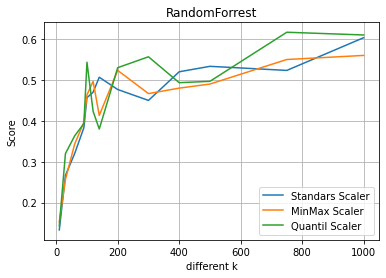

In [75]:
plt.grid()
plt.plot(df_plot_standard_RM.k,df_plot_standard_RM.Score,label = "Standars Scaler")
plt.plot(df_plot_minmax_RM.k,df_plot_minmax_RM.Score,label = "MinMax Scaler")
plt.plot(df_plot_quantil_RM.k,df_plot_quantil_RM.Score,label = "Quantil Scaler")
plt.xlabel("different k")
plt.ylabel("Score")
plt.title("RandomForrest")
plt.legend()

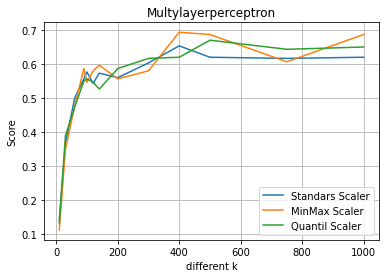

In [74]:
plt.grid()
plt.plot(df_plot_standard_MLP.k,df_plot_standard_MLP.Score,label = "Standars Scaler")
plt.plot(df_plot_minmax_MLP.k,df_plot_minmax_MLP.Score,label = "MinMax Scaler")
plt.plot(df_plot_quantil_MLP.k,df_plot_quantil_MLP.Score,label = "Quantil Scaler")
plt.xlabel("different k")
plt.ylabel("Score")
plt.title("Multylayerperceptron")
plt.legend()

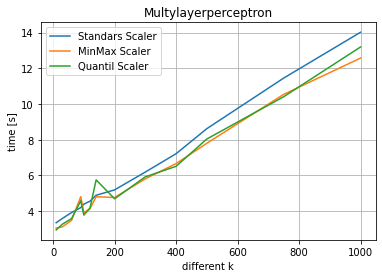

In [84]:
plt.grid()
plt.plot(df_plot_standard_MLP.k,df_plot_standard_MLP.Fittime,label = "Standars Scaler")
plt.plot(df_plot_minmax_MLP.k,df_plot_minmax_MLP.Fittime,label = "MinMax Scaler")
plt.plot(df_plot_quantil_MLP.k,df_plot_quantil_MLP.Fittime,label = "Quantil Scaler")
plt.xlabel("different k")
plt.ylabel("time [s]")
plt.title("Multylayerperceptron")
plt.legend()

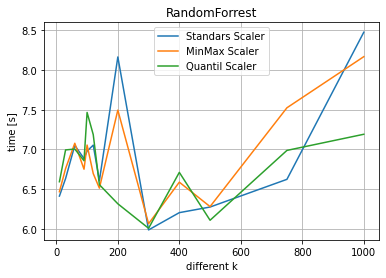

In [85]:
plt.grid()
plt.plot(df_plot_standard_RM.k,df_plot_standard_RM.Fittime,label = "Standars Scaler")
plt.plot(df_plot_minmax_RM.k,df_plot_minmax_RM.Fittime,label = "MinMax Scaler")
plt.plot(df_plot_quantil_RM.k,df_plot_quantil_RM.Fittime,label = "Quantil Scaler")
plt.xlabel("different k")
plt.ylabel("time [s]")
plt.title("RandomForrest")
plt.legend()

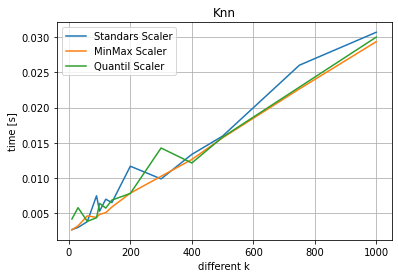

In [86]:
plt.grid()
plt.plot(df_plot_standard_knn.k,df_plot_standard_knn.Fittime,label = "Standars Scaler")
plt.plot(df_plot_minmax_knn.k,df_plot_minmax_knn.Fittime,label = "MinMax Scaler")
plt.plot(df_plot_quantil_knn.k,df_plot_quantil_knn.Fittime,label = "Quantil Scaler")
plt.xlabel("different k")
plt.ylabel("time [s]")
plt.title("Knn")
plt.legend()

In [43]:
results.k[1:39]

1       10
2       10
3       30
4       30
5       30
6       60
7       60
8       60
9       90
10      90
11      90
12     100
13     100
14     100
15     120
16     120
17     120
18     140
19     140
20     140
21     200
22     200
23     200
24     300
25     300
26     300
27     400
28     400
29     400
30     500
31     500
32     500
33     750
34     750
35     750
36    1000
37    1000
38    1000
Name: k, dtype: object

# Validation

In [ ]:
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

In [ ]:
#VT = VarianceThreshold(threshold=0.05)
features = df_test.loc[:,'V1':'V10000']
#target = df_test.loc[:,'Class']
num_features = features.shape[1]
features

# Create and fit selector
k= int(sqrt(num_features)*1.7)
print(k)
selector = SelectKBest(k=k)
# Get columns to keep and create new dataframe with those only
cols = selector.fit(features.values, target.values).get_support(indices=True)
df_test = features.iloc[:,cols]

In [ ]:
scaler = StandardScaler()  
scaler.fit(df_test) 
df_test_SC = scaler.transform(df_test) 

In [ ]:
Y_pred = clf.predict(df_test_SC)

In [ ]:
Y_pred = rf_shallow.predict(df_test_SC)

# Filepreparation for the Kagglecompetition

In [ ]:
solution_data = list(zip(list(range(750,1500)), Y_pred))

In [ ]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'Class'])
solution_table.Class

In [ ]:
solution_table.to_csv(f"results/SC_MLP.csv", index=False)